In [1]:


# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

In [99]:
data = pd.read_csv('../raw_data/hotel_bookings.csv')
df = data.copy() # going to preserve the original data in case we need to compare later
df = df[(df['adr'] < 700) & (df['adr'] >= 0)]
df = df[df['adults'] > 0]
df['length_of_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df.shape

(118985, 33)

In [45]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0000,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,nan,nan,0,Transient,0.0000,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0000,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,nan,nan,0,Transient,0.0000,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0000,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,nan,nan,0,Transient,75.0000,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0000,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0000,nan,0,Transient,75.0000,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0000,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0000,nan,0,Transient,98.0000,0,1,Check-Out,2015-07-03


In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.0000,119390.0000,119390.0000,119390.0000,119390.0000,119390.0000,119390.0000,119390.0000,119386.0000,119390.0000,119390.0000,119390.0000,119390.0000,119390.0000,103050.0000,6797.0000,119390.0000,119390.0000,119390.0000,119390.0000
mean,0.3704,104.0114,2016.1566,27.1652,15.7982,0.9276,2.5003,1.8564,0.1039,0.0079,0.0319,0.0871,0.1371,0.2211,86.6934,189.2667,2.3211,101.8311,0.0625,0.5714
std,0.4829,106.8631,0.7075,13.6051,8.7808,0.9986,1.9083,0.5793,0.3986,0.0974,0.1758,0.8443,1.4974,0.6523,110.7745,131.6550,17.5947,50.5358,0.2453,0.7928
min,0.0000,0.0000,2015.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,6.0000,0.0000,-6.3800,0.0000,0.0000
25%,0.0000,18.0000,2016.0000,16.0000,8.0000,0.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.0000,62.0000,0.0000,69.2900,0.0000,0.0000
50%,0.0000,69.0000,2016.0000,28.0000,16.0000,1.0000,2.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,14.0000,179.0000,0.0000,94.5750,0.0000,0.0000
75%,1.0000,160.0000,2017.0000,38.0000,23.0000,2.0000,3.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,229.0000,270.0000,0.0000,126.0000,0.0000,1.0000
max,1.0000,737.0000,2017.0000,53.0000,31.0000,19.0000,50.0000,55.0000,10.0000,10.0000,1.0000,26.0000,72.0000,21.0000,535.0000,543.0000,391.0000,5400.0000,8.0000,5.0000


In [5]:
print("# of NaN in each columns:", data.isnull().sum(), sep='\n')

# of NaN in each columns:
hotel                             0     
is_canceled                       0     
lead_time                         0     
arrival_date_year                 0     
arrival_date_month                0     
arrival_date_week_number          0     
arrival_date_day_of_month         0     
stays_in_weekend_nights           0     
stays_in_week_nights              0     
adults                            0     
children                          4     
babies                            0     
meal                              0     
country                           488   
market_segment                    0     
distribution_channel              0     
is_repeated_guest                 0     
previous_cancellations            0     
previous_bookings_not_canceled    0     
reserved_room_type                0     
assigned_room_type                0     
booking_changes                   0     
deposit_type                      0     
agent                          

In [6]:
# Fill missing data

df['children'] =  df['children'].fillna(0)
# df['all_children'] =  df['all_children'].fillna(0)
df['country'] = df['country'].fillna(df['country'].mode().index[0])
df['agent']= df['agent'].fillna('0')
df=df.drop(['company'], axis =1)

In [7]:
# separation of Numerical and Categorical Variables/Columns
# we want outcome to be 'is_canceled'
cat_col = df.select_dtypes(include=['object']).columns.tolist()
num_col = df.select_dtypes(exclude=['object']).columns.tolist()

In [8]:
num_col

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

# I need to cut this down for it to be readable
pd.plotting.scatter_matrix(df[num_col], figsize = (15, 15), diagonal = 'hist');

In [61]:
df.sort_values(by = 'babies',ascending = False).head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
46619,City Hotel,0,37,2016,January,3,12,0,2,2,0.0000,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,9.0000,nan,0,Transient,84.4500,0,1,Check-Out,2016-01-14
78656,City Hotel,0,11,2015,October,42,11,2,1,1,0.0000,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,95.0000,nan,0,Transient-Party,95.0000,0,0,Check-Out,2015-10-14
84591,City Hotel,0,4,2016,February,10,28,1,0,2,1.0000,2,BB,PRT,Direct,Direct,0,0,0,G,G,0,No Deposit,nan,nan,0,Transient,226.0000,0,3,Check-Out,2016-02-29
264,Resort Hotel,0,21,2015,July,28,10,2,3,2,0.0000,2,HB,PRT,Direct,Direct,0,0,0,C,C,1,No Deposit,250.0000,nan,0,Transient,165.0000,1,3,Check-Out,2015-07-15
6719,Resort Hotel,1,116,2016,June,27,26,3,5,2,0.0000,2,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,250.0000,nan,0,Transient,145.8800,0,0,Canceled,2016-05-27
14556,Resort Hotel,0,66,2016,December,53,30,1,2,2,0.0000,2,BB,NaN,Direct,Direct,0,0,0,G,G,2,No Deposit,nan,nan,0,Transient,197.6700,1,1,Check-Out,2017-01-02
39634,Resort Hotel,0,247,2017,August,33,16,2,6,2,0.0000,2,BB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,0,No Deposit,96.0000,nan,0,Transient,141.6800,0,1,Check-Out,2017-08-24
84429,City Hotel,0,1,2016,February,9,25,0,1,2,1.0000,2,BB,PRT,Direct,Direct,0,0,0,G,G,0,No Deposit,nan,nan,0,Transient,227.0000,0,3,Check-Out,2016-02-26
33332,Resort Hotel,0,31,2017,February,8,19,1,0,2,0.0000,2,BB,PRT,Online TA,TA/TO,0,0,0,A,C,2,No Deposit,240.0000,nan,0,Transient-Party,50.0000,1,2,Check-Out,2017-02-20
7896,Resort Hotel,1,345,2016,September,36,1,2,7,2,0.0000,2,BB,PRT,Online TA,TA/TO,0,0,0,G,G,2,No Deposit,240.0000,nan,0,Transient,145.0000,0,1,Canceled,2016-02-23


In [46]:
df['adr'].describe()

count   119388.0000
mean    101.7877   
std     48.1527    
min     0.0000     
25%     69.2900    
50%     94.5750    
75%     126.0000   
max     510.0000   
Name: adr, dtype: float64

Text(0.5, 1.0, 'Histogram of ADR')

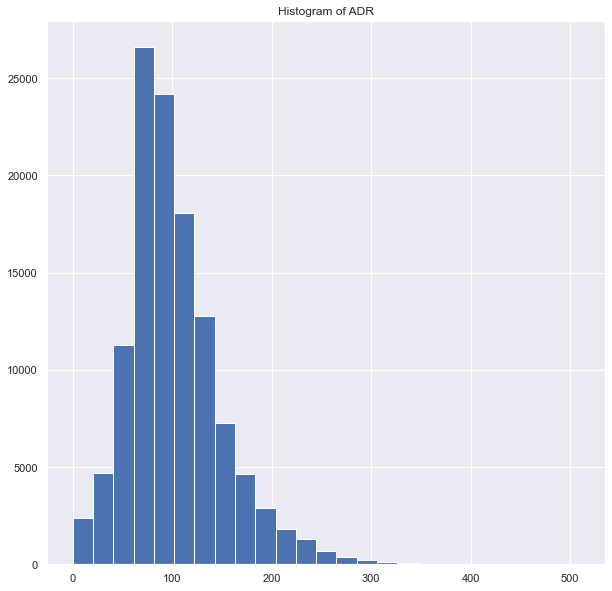

In [48]:
# two outliers have been removed here
fig, ax = plt.subplots(figsize =(10, 10)) 
ax.hist(df['adr'], bins = 25); 
plt.title('Histogram of ADR')

count   118985.0000
mean    1.8627     
std     0.5701     
min     1.0000     
25%     2.0000     
50%     2.0000     
75%     2.0000     
max     55.0000    
Name: adults, dtype: float64


Text(0.5, 1.0, 'Histogram of Adults')

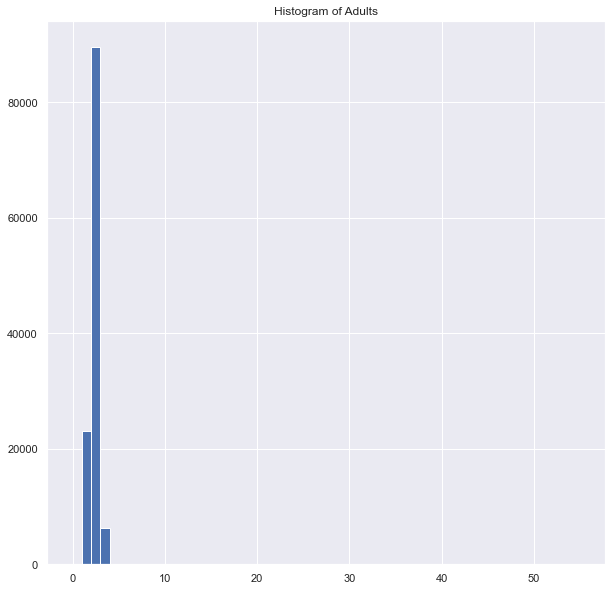

In [85]:
## Adults
print(df['adults'].describe())

fig, ax = plt.subplots(figsize =(10, 10)) 
ax.hist(df['adults'], bins = [0,1, 2, 3, 4, 5, 10, df['adults'].max()]); 
plt.title('Histogram of Adults')

count   118985.0000
mean    0.0080     
std     0.0975     
min     0.0000     
25%     0.0000     
50%     0.0000     
75%     0.0000     
max     10.0000    
Name: babies, dtype: float64


Text(0.5, 1.0, 'Histogram of Babies')

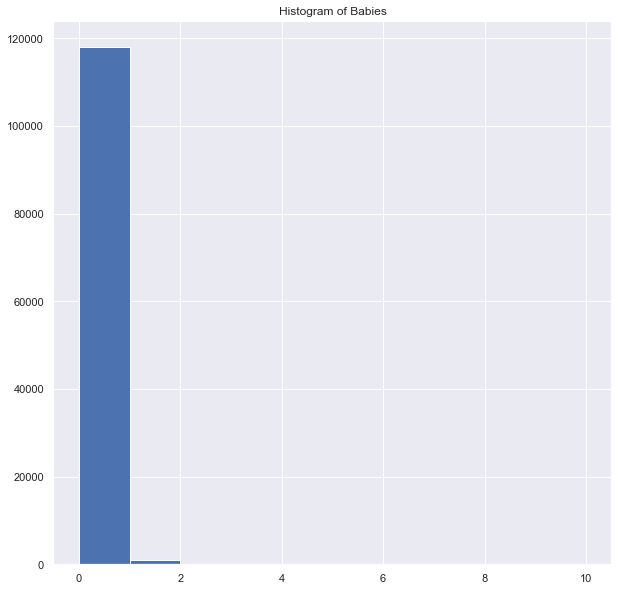

In [84]:
## Babies
print(df['babies'].describe())

fig, ax = plt.subplots(figsize =(10, 10)) 
ax.hist(df['babies'], bins = [0, 1, 2, 3,  df['babies'].max()]); 
plt.title('Histogram of Babies')

count   118981.0000
mean    0.1004     
std     0.3902     
min     0.0000     
25%     0.0000     
50%     0.0000     
75%     0.0000     
max     10.0000    
Name: children, dtype: float64


Text(0.5, 1.0, 'Histogram of Children')

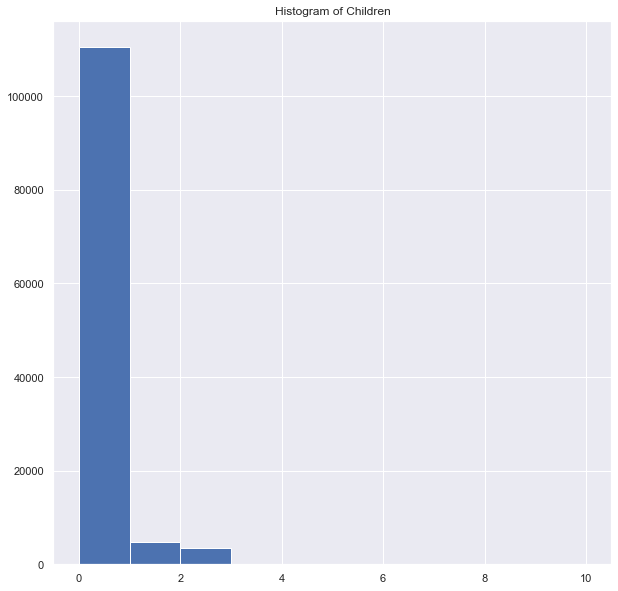

In [83]:
## Children
print(df['children'].describe())

fig, ax = plt.subplots(figsize =(10, 10)) 
ax.hist(df['children'], bins = [0, 1, 2, 3, 4, 5, df['children'].max()]); 
plt.title('Histogram of Children')

count   118985.0000
mean    0.2185     
std     0.6381     
min     0.0000     
25%     0.0000     
50%     0.0000     
75%     0.0000     
max     18.0000    
Name: booking_changes, dtype: float64


Text(0.5, 1.0, 'Histogram of Booking Changes')

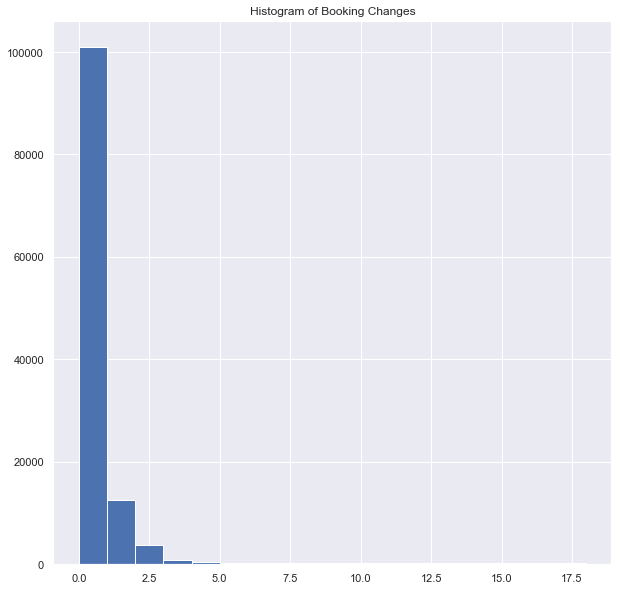

In [87]:
# booking changes


print(df['booking_changes'].describe())

fig, ax = plt.subplots(figsize =(10, 10)) 
ax.hist(df['booking_changes'], bins = [0, 1, 2, 3, 4, 5, df['booking_changes'].max()]); 
plt.title('Histogram of Booking Changes')

count   118985.0000
mean    2.3256     
std     17.6143    
min     0.0000     
25%     0.0000     
50%     0.0000     
75%     0.0000     
max     391.0000   
Name: days_in_waiting_list, dtype: float64


Text(0.5, 1.0, 'Histogram of Days in Waiting List')

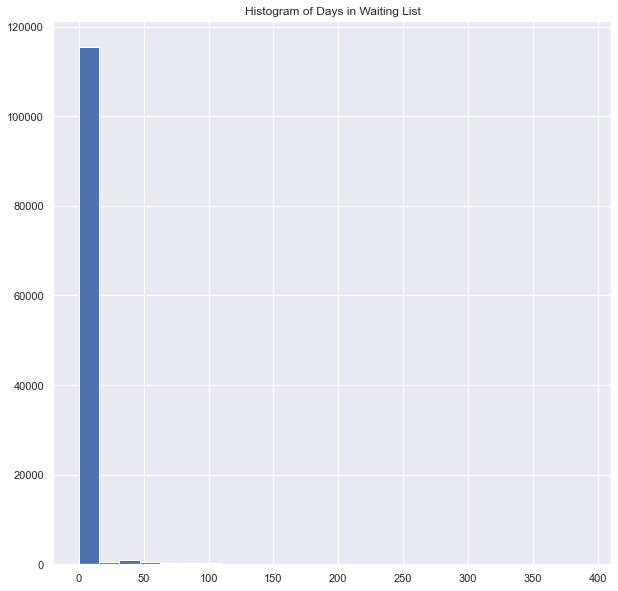

In [96]:
# days in waiting list


print(df['days_in_waiting_list'].describe())

fig, ax = plt.subplots(figsize =(10, 10)) 
ax.hist(df['days_in_waiting_list'], bins = 25); # [0, 1, 25, 50, 100, 200, 300, df['days_in_waiting_list'].max()]
plt.title('Histogram of Days in Waiting List')

count   118985.0000
mean    104.0704   
std     106.8912   
min     0.0000     
25%     18.0000    
50%     69.0000    
75%     160.0000   
max     737.0000   
Name: lead_time, dtype: float64


Text(0.5, 1.0, 'Histogram of Lead Time')

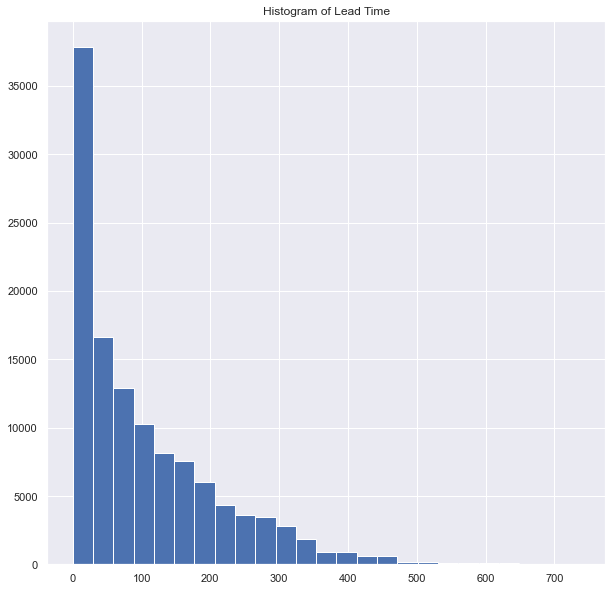

In [95]:
# lead time


print(df['lead_time'].describe())

fig, ax = plt.subplots(figsize =(10, 10)) 
ax.hist(df['lead_time'], bins = 25); #[0, 1, 25, 50, 100, 200, 300, df['lead_time'].max()]
plt.title('Histogram of Lead Time')

count   118985.0000
mean    0.0873     
std     0.8457     
min     0.0000     
25%     0.0000     
50%     0.0000     
75%     0.0000     
max     26.0000    
Name: previous_cancellations, dtype: float64


Text(0.5, 1.0, 'Histogram of Previous Cancellations')

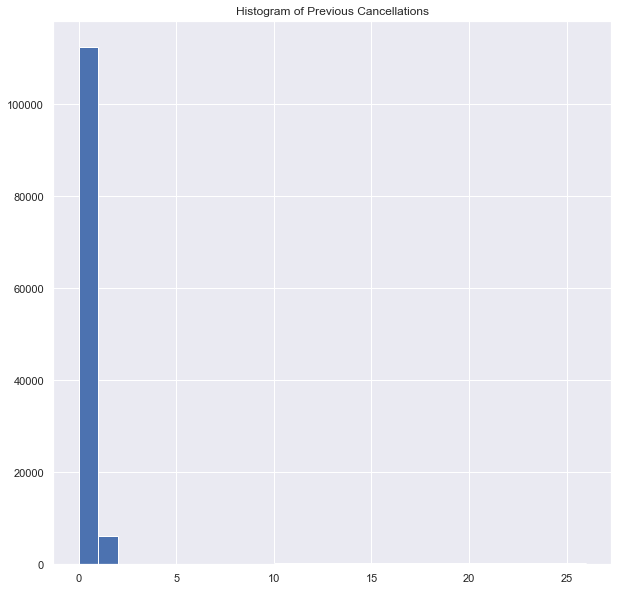

In [101]:
# previous cancellations


print(df['previous_cancellations'].describe())

fig, ax = plt.subplots(figsize =(10, 10)) 
ax.hist(df['previous_cancellations'], bins = [0, 1, 2, 3, 4, 5, 10, df['previous_cancellations'].max()]); #
plt.title('Histogram of Previous Cancellations')

count   118985.0000
mean    3.4260     
std     2.5416     
min     0.0000     
25%     2.0000     
50%     3.0000     
75%     4.0000     
max     69.0000    
Name: length_of_stay, dtype: float64


Text(0.5, 1.0, 'Histogram of Length of Stay')

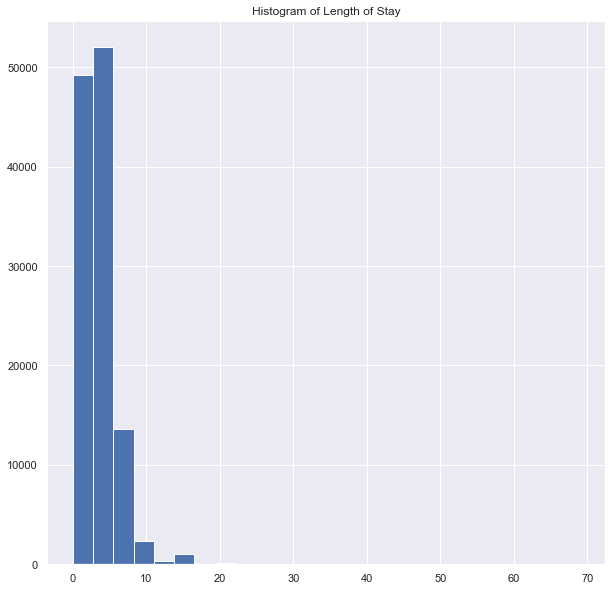

In [105]:
# length of stay


print(df['length_of_stay'].describe())

fig, ax = plt.subplots(figsize =(10, 10)) 
ax.hist(df['length_of_stay'], bins = 25); #[0, 1, 5, 10, df['length_of_stay'].max()]
plt.title('Histogram of Length of Stay')

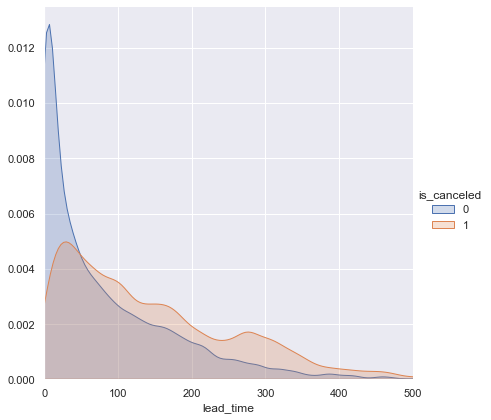

In [9]:
# shows that if the stay is a long time away cancellation is more likely
(sns.FacetGrid(data, hue = 'is_canceled',
             height = 6,
             xlim = (0,500))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend());

Text(0, 0.5, 'Count')

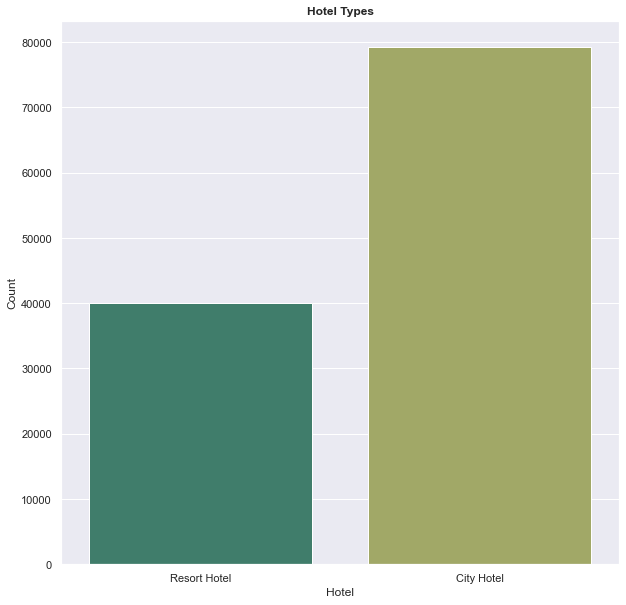

In [10]:
# Hotel types details

plt.figure(figsize=(10,10))
sns.countplot(x='hotel', data = df, palette='gist_earth')
plt.title('Hotel Types', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Canceled or Not Canceled')

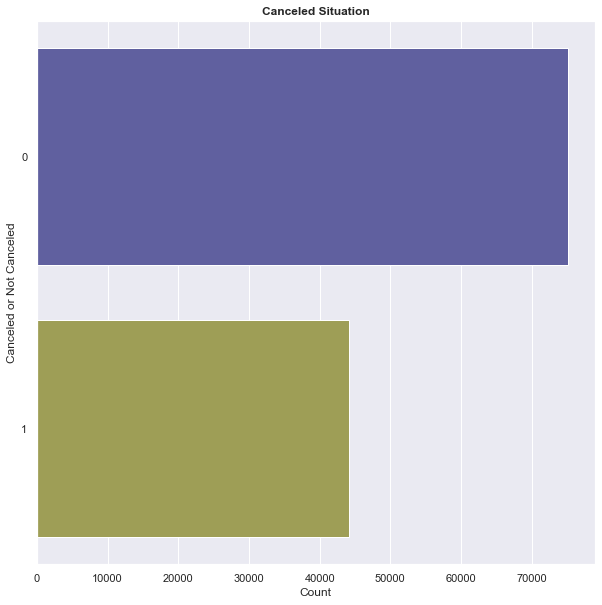

In [11]:
# `is_canceled` graph

plt.figure(figsize=(10,10))
sns.countplot(y='is_canceled', data= df, palette='gist_stern', orient = 'v')
plt.title('Canceled Situation', weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Canceled or Not Canceled', fontsize=12)

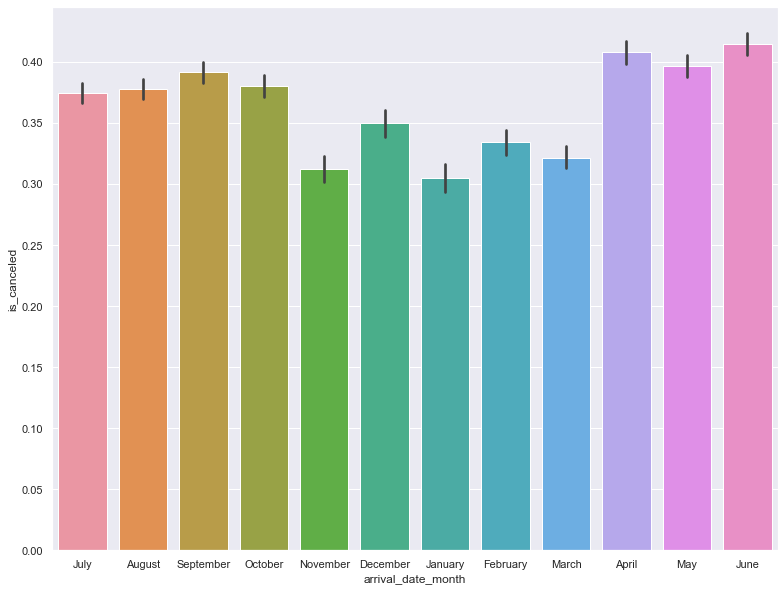

In [12]:
# cancellation share by month
plt.figure(figsize = (13,10))
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', data = df);

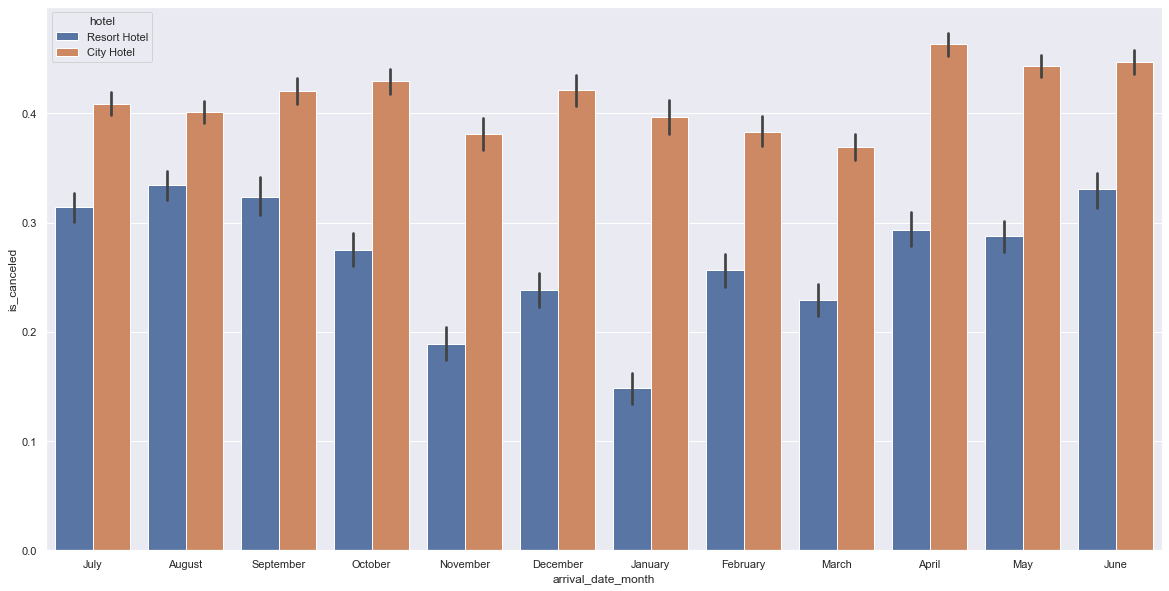

In [13]:
# so there are different types of hotels in here 
# and we can see that there are significant differences in the cancellation rate by type of hotel
# cancallation of city is pretty steady, cancellation of resort in the winter is very low
plt.figure(figsize = (20,10))
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', data = data);

In [14]:
# Table of `stay_in_weekend` and `stay_in_week_nights` features
# this shows that many stays overlap week days and weekends

# we may want to test an interaction term or a transformation here
pd.crosstab(index = df['stays_in_week_nights']
            ,columns=df['stays_in_weekend_nights']
            , margins=True, margins_name = 'Total').iloc[:10]

stays_in_weekend_nights,0,1,2,3,4,5,6,7,8,9,10,12,13,14,16,18,19,Total
stays_in_week_nights,,,,,,,,,,,,,,,,,,
0,715,4569,2361,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7645
1,16451,7326,6533,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30310
2,17956,8979,6749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33684
3,11564,6152,4542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22258
4,4482,2412,2669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9563
5,830,1188,8655,310,94,0,0,0,0,0,0,0,0,0,0,0,0,11077
6,0,0,851,301,347,0,0,0,0,0,0,0,0,0,0,0,0,1499
7,0,0,446,399,184,0,0,0,0,0,0,0,0,0,0,0,0,1029
8,0,0,393,131,132,0,0,0,0,0,0,0,0,0,0,0,0,656


In [15]:
## Creating new feature: `Weekday vs Weekend` 

# this transformation is awful I would definitely want to fix this idea if we are going to use it
pd.options.mode.chained_assignment = None
def week_function(feature1, feature2, data_source):
    data_source['weekend_or_weekday'] = 0
    for i in range(0, len(data_source)):
        if feature2.iloc[i] == 0 and feature1.iloc[i] > 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_just_weekend'
        if feature2.iloc[i] > 0 and feature1.iloc[i] == 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_just_weekday'
        if feature2.iloc[i] > 0 and feature1.iloc[i] > 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_both_weekday_and_weekend'
        if feature2.iloc[i] == 0 and feature1.iloc[i] == 0:
            df['weekend_or_weekday'].iloc[i] = 'undefined_data'

            
week_function(df['stays_in_weekend_nights'],df['stays_in_week_nights'], df)

Text(0, 0.5, 'Count')

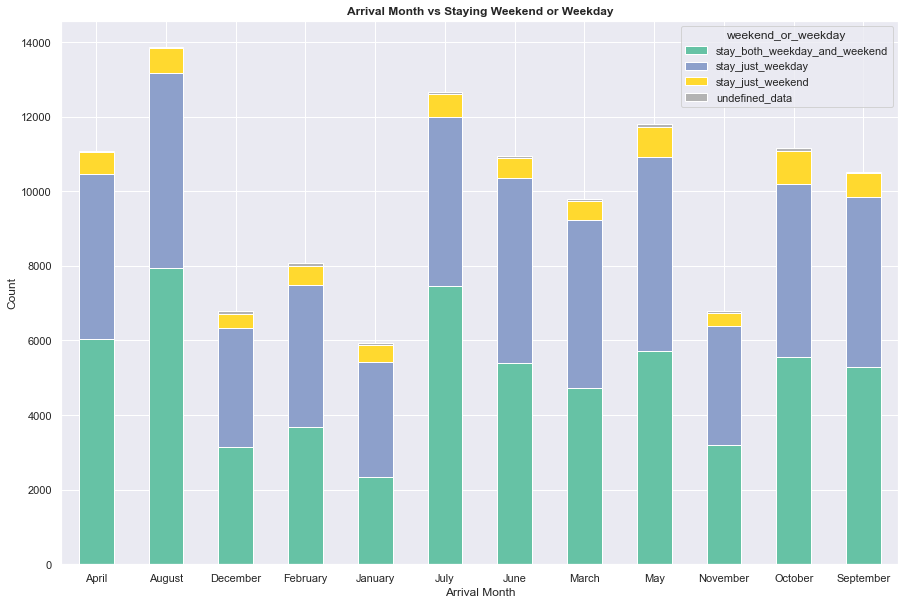

In [16]:
#`arrival_date_month` vs `weekend_or_weekday` graph 

#df['arrival_date_month']= df['arrival_date_month'].astype('int64')
group_data = df.groupby([ 'arrival_date_month','weekend_or_weekday']).size().unstack(fill_value=0)
group_data.sort_values('arrival_date_month', ascending = True).plot(kind='bar',stacked=True, cmap='Set2',figsize=(15,10))
plt.title('Arrival Month vs Staying Weekend or Weekday', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

In [30]:
df.shape

(119390, 32)

In [29]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

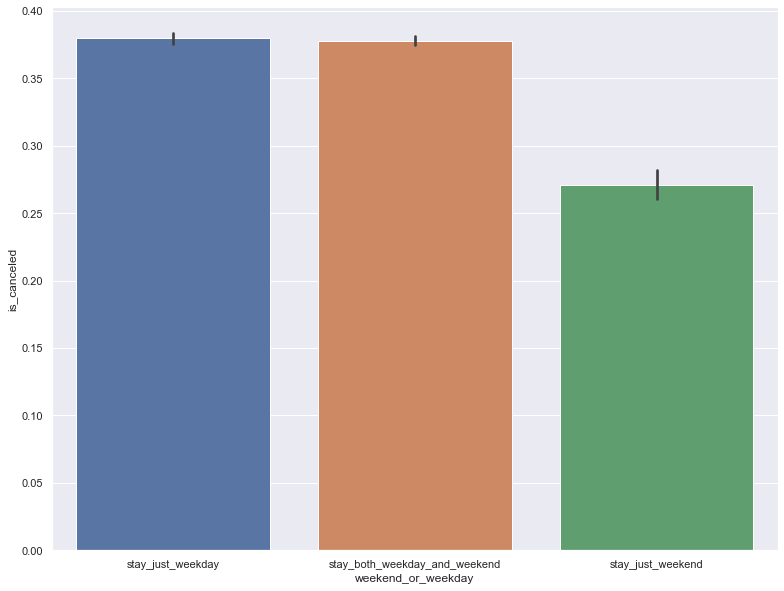

In [24]:
# cancellation share by type of stay

# seems there's a slight difference where weekend stays are cancelled less
plt.figure(figsize = (13,10))
sns.barplot(x = 'weekend_or_weekday', y = 'is_canceled', data = df.loc[df['weekend_or_weekday'] != 'undefined_data']);

Text(0, 0.5, 'Count')

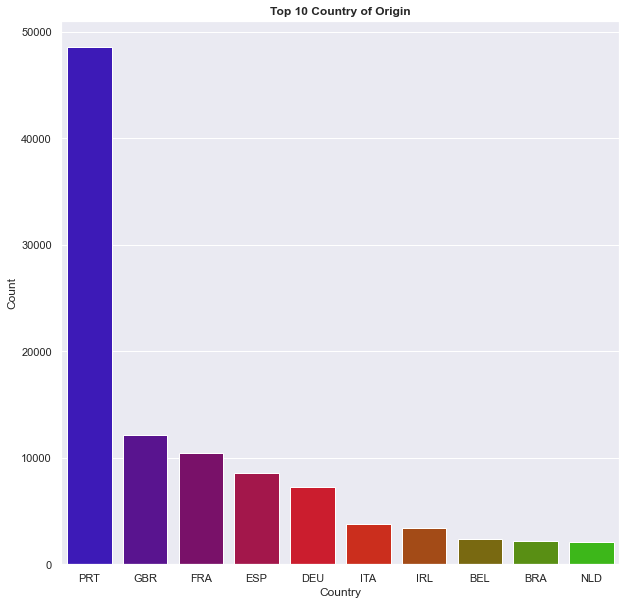

In [18]:
# Create Top 10 Country of Origin graph

plt.figure(figsize=(10,10))
sns.countplot(x='country', data=df, 
              order=pd.value_counts(df['country']).iloc[:10].index, palette="brg")
plt.title('Top 10 Country of Origin', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

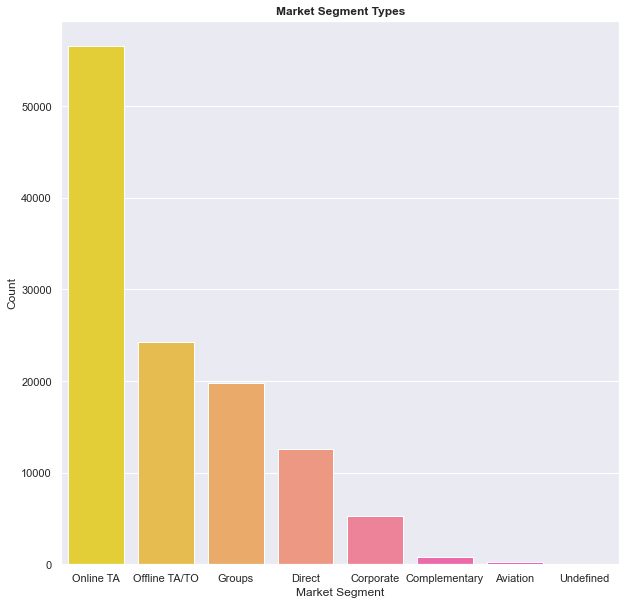

In [19]:
# `Market_segment` feature exploration

plt.figure(figsize=(10,10))
sns.countplot(df['market_segment'], palette='spring_r', 
              order=pd.value_counts(df['market_segment']).index)
plt.title('Market Segment Types', weight='bold')
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)

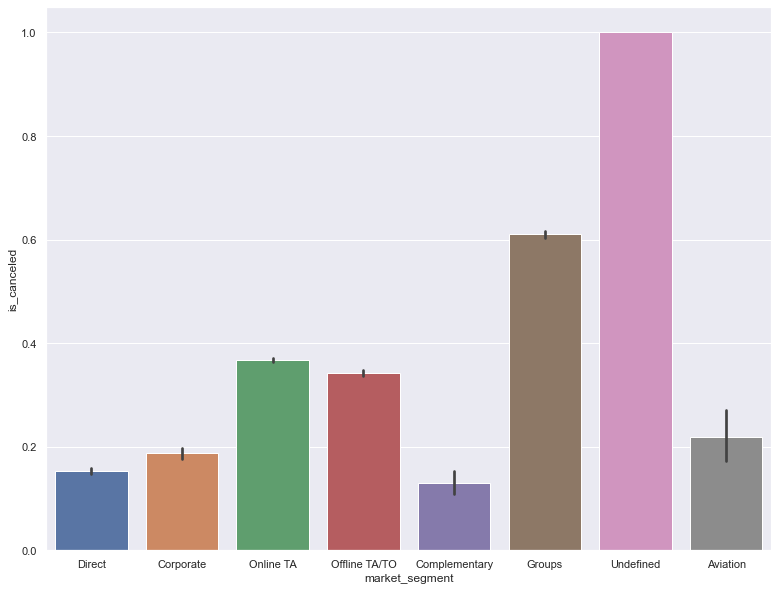

In [20]:
# cancellation share by type of booking

# seems there's a slight difference where weekend stays are cancelled less
plt.figure(figsize = (13,10))
sns.barplot(x = 'market_segment', y = 'is_canceled', data = df);

Text(0, 0.5, 'Count')

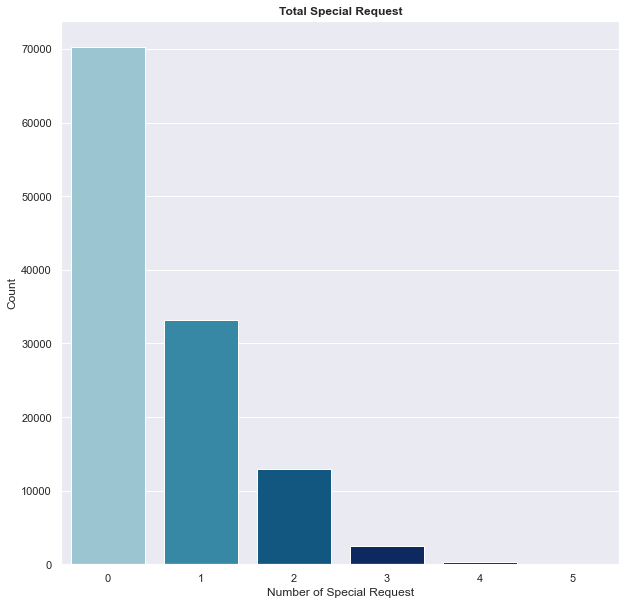

In [21]:
# `total_of_special_requests` graph

plt.figure(figsize=(10,10))
sns.countplot(x='total_of_special_requests', data=df, palette = 'ocean_r')
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

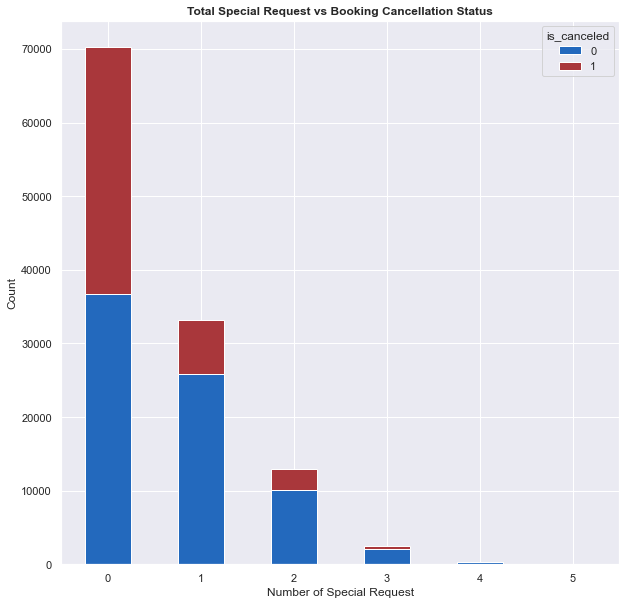

In [22]:
# Group by `total_of_special_requests` and `is_canceled` features

group_adr_request = df.groupby([ 'total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)
group_adr_request.plot(kind='bar', stacked=True, cmap='vlag', figsize=(10,10))
plt.title('Total Special Request vs Booking Cancellation Status', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

Text(0.5, 1.0, 'Correlation Matrix Pearson Method- Numerical Data ')

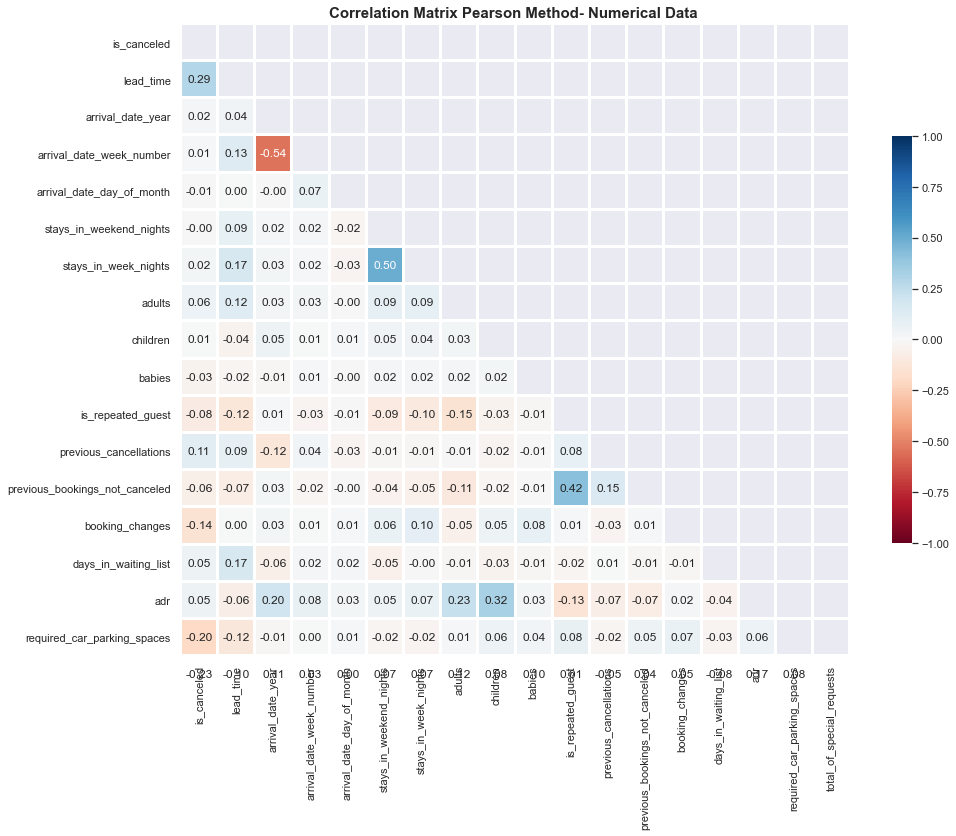

In [23]:
# Correlation Matrix with pearson method

plt.figure(figsize=(15,15))
corr_numerical=df[num_col].corr(method='pearson')
mask_numerical = np.triu(np.ones_like(corr_numerical, dtype=np.bool))
sns.heatmap(corr_numerical, annot=True, fmt=".2f", cmap='RdBu', mask= mask_numerical, vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(17, 0))
plt.title("Correlation Matrix Pearson Method- Numerical Data ",size=15, weight='bold')